<a href="https://colab.research.google.com/github/FranciscoNav/springboard/blob/main/Train_test_Split_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train test split

---



In [ ]:
# The first step is to split your data into two pieces, a training set and a testing set.
# Typically, about 75% of the data goes to your training set and about 25% of your data goes to the test set.
# The second step of the process is to train the model on the training set.

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

In [ ]:
# features matrix
x = df.loc[:,['HouseAge','AveRooms','AveBedrms']].values

# target vector
y = df.loc[:, 'target'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=3)

In [ ]:
# make a linear regression instance
reg = LinearRegression(fit_intercept=True)

#  Train the model on the training set
reg.fit(x_train, y_train)

In [ ]:
# test the model on the testing set and evaluate performance
score = reg.score(x_test,y_test)
print(score)

# Logistic Regression

---



In [ ]:
# Be sure to clear all outputs from above before proceeding
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# A1 us virginica flower and a 0 is versicolor flower
df = pd.read_csv('/content/sample_data/modifiedIris2Classes.csv')
df.shape
df.head()

In [ ]:
# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'],random_state=0)

**Standardize the data:**
A really important part of this process is to standardize your data. Logistic regression is affected by scale, so you need to scale your features onto unit scale for optimal performance. Unit scale means having a mean of 0 and a variance of 1 for your features. You can utilize scikit-learn's standard scaler to accomplish this.

In [ ]:
scaler = StandardScaler()

# Fit on taining set only
scaler.fit(x_train)

# Apply transform to both the training set and the test set
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Make instance of model
clf = LogisticRegression()

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between x(features sepal width, sepal hight ect) and y (labels-which species of iris)
clf.fit(x_train, y_train)

Predict the labels of new data (new flowers)

In [ ]:
# one observation  petal length after standardization
x_test[0].reshape(1,-1)

In [ ]:
print('prediction', clf.predict(x_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(x_test[0].reshape(1,-1)))
# What this code is showing is a prediction for one flower sample. The prediction was zero.
# The probability of a zero, according to the model was 0.52, the probability of one was 0.47.

In [ ]:
# Accuracy is defined as: correct predictions/ total number of data points
score = clf.score(x_test,y_test)
print(score)

# Logistic Regression for multiclass Classification

---



In [60]:
# Be sure to clear all outputs from above before proceeding
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [61]:
# Load Dataset
df = pd.read_csv('/content/sample_data/modifiedDigits4Classes.csv')
df.head()
df.shape

(720, 65)

### Visualize Each Digit

In [62]:
pixel_colnames = df.columns[:-1]
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [69]:
# Get all columns except the label column for first image
image_values = df.loc[0, pixel_colnames].values
image_values

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0])

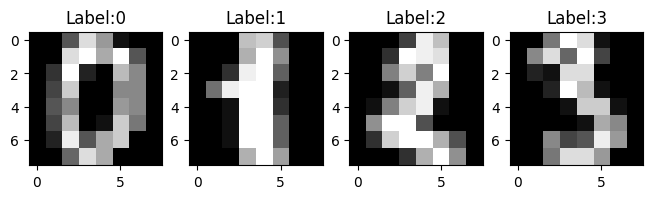

In [64]:
plt.figure(figsize=(10,2))
for index in range(0,4):
  plt.subplot(1,5,1 + index)
  image_values = df.loc[index, pixel_colnames].values
  image_label = df.loc[index,'label']
  plt.imshow(image_values.reshape(8,8), cmap ='gray')
  plt.title('Label:' + str(image_label))

In [65]:
# Split data into Training and test sets
x_train, x_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'],random_state=0)

In [66]:
# Standardize the data
scaler = StandardScaler()

# Fit on training set only
scaler.fit(x_train)

# Apply transform to both the training set and the test set
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
# logistic regression

# multi-class is specifying one versus rest
clf = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

clf.fit(x_train, y_train)
print('Training accuracy:', clf.score(x_train, y_train))
print('Test accuracy:', clf.score(x_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [74]:
print(clf.intercept_)
print(clf.coef_.shape)

[-2.712674   -3.54379096 -3.18367757 -2.623974  ]
(4, 64)


In [80]:
# Predictions
# the second class is the highest score it will be the prediction for this data
clf.predict_proba(x_test[0:1])
# clf.predict(x_test[0:1])

array([1])